In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\airline_sentiment_analysis.csv')

In [3]:
print(data)

       Unnamed: 0 airline_sentiment  \
0               1          positive   
1               3          negative   
2               4          negative   
3               5          negative   
4               6          positive   
...           ...               ...   
11536       14633          negative   
11537       14634          negative   
11538       14635          positive   
11539       14636          negative   
11540       14638          negative   

                                                    text  
0      @VirginAmerica plus you've added commercials t...  
1      @VirginAmerica it's really aggressive to blast...  
2      @VirginAmerica and it's a really big bad thing...  
3      @VirginAmerica seriously would pay $30 a fligh...  
4      @VirginAmerica yes, nearly every time I fly VX...  
...                                                  ...  
11536  @AmericanAir my flight was Cancelled Flightled...  
11537         @AmericanAir right on cue with the delays👌  


In [4]:
airline_tweets = pd.read_csv((r'C:\Users\user\Downloads\airline_sentiment_analysis.csv'))

In [5]:
airline_tweets.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [6]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


In [ ]:
airline_sentiment = airline_tweets.groupby(['Unnamed: 0', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

<AxesSubplot:xlabel='airline_sentiment', ylabel='Unnamed: 0'>

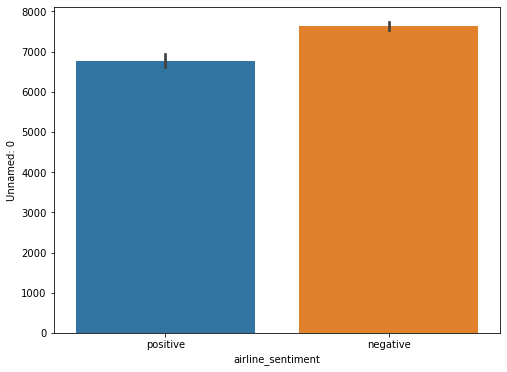

In [8]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='Unnamed: 0' , data=airline_tweets)


In [9]:
features = airline_tweets.iloc[:, 1].values
labels = airline_tweets.iloc[:, 1].values

In [16]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [17]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [19]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [20]:
predictions = text_classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1839    0]
 [   0  470]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1839
    positive       1.00      1.00      1.00       470

    accuracy                           1.00      2309
   macro avg       1.00      1.00      1.00      2309
weighted avg       1.00      1.00      1.00      2309

1.0


In [ ]:
from wsgiref.simple_server import make_server
from pyramid.config import Configurator
from pyramid.response import Response


def hello_world(request):
    return Response('Hello World!')


if __name__ == '__main__':
    with Configurator() as config:
        config.add_route('hello', '/')
        config.add_view(hello_world, route_name='hello')
        app = config.make_wsgi_app()
    server = make_server('0.0.0.0', 6543, app)
    server.serve_forever()

127.0.0.1 - - [25/Nov/2020 17:41:46] "GET / HTTP/1.1" 200 12
